In [4]:
#importing libs
import numpy as np
import matplotlib.pyplot as plt

In [48]:
#defining the matrices
def matrix_A(u,e,g):
        A = np.zeros((3,3))
        A[0,1] = 1
        A[1,0] = -u**2
        A[1,1] = 2*u
        A[1,2] = g-1
        A[2,0] = -u*e*g
        A[2,1] = g*e
        A[2,2] = u
        return A

def matrix_Omega(u,e,g):
    c = np.sqrt(g*(g-1)*e)
    O = np.zeros((3,3))
    O[0,0] = -u*c
    O[0,1] = c
    O[0,2] = O[1,2] = O[2,2] = g-1
    O[1,0] = -c**2
    O[2,0] = u*c
    O[2,1] = -c
    return O

def matrix_Lambda(u,e,g):
    c = np.sqrt(g*(g-1)*e)
    Lambda = np.diag([abs(u+c),abs(u),abs(u-c)])
    return Lambda

In [57]:
#initializing parameters
l = 10
uL = 0
uR = 0
rhoL = 13
rhoR = 1.3
PL = 1e6
PR = 1e5



tau = 1e-4
h = 0.2

t0,t1 = 0,0.02
g = 5/3

In [58]:
#coordinate vector
x = np.linspace(-l,l,int(2*l/h +1))
T = np.linspace(t0,t1,int((t1-t0)/tau + 1))

#vector of initial conservative variables: [rho, rho*u, rho*e]
w = np.zeros((len(x),3))
for i in range(len(x)):
            if (x[i]<0):
                w[i,0] = rhoL
                w[i,1] = rhoL*uL
                w[i,2] = PL/(g-1)
            else:
                w[i,0] = rhoR
                w[i,1] = rhoR*uR
                w[i,2] = PR/(g-1)
K = np.zeros((len(T),len(x),3))
K[0] = w

In [59]:
#solving the system
t_now = t0
P = np.zeros((len(T),len(x)))
P[0] = K[0].T[-1]*(g-1)
for it in range(1,len(T)):
    
    w_new = np.copy(K[it])
    w = np.copy(K[it-1])
    for ix in range(1,len(x)-1):
        A = matrix_A(w[ix,1]/w[ix,0],w[ix,2]/w[ix,0],g)
        O = matrix_Omega(w[ix,1]/w[ix,0],w[ix,2]/w[ix,0],g)
        L = matrix_Lambda(w[ix,1]/w[ix,0],w[ix,2]/w[ix,0],g)
        
        mult = np.dot(np.linalg.inv(O),np.dot(L,O))
        w_new[ix] = w[ix] - tau / (2 * h)*(np.dot(A,w[ix+1]-w[ix-1]) - np.dot(mult, w[ix+1]+w[ix-1]-2*w[ix]))
    
    w_new[0] = w_new[1]
    w_new[-1]= w_new[-2]
    K[it] = np.copy(w_new)
    P[it] = K[it].T[-1]*(g-1)  

In [81]:
#results in primitive variable

P = np.zeros((len(T),len(x)))
e = np.zeros((len(T),len(x)))
rho = np.zeros((len(T),len(x)))
u = np.zeros((len(T),len(x)))

#copying the results from 3rd rang tensor K to matrices rho, u, e, P
rho = K[...,0]
u = K[...,1]/rho
e = K[...,2]/rho
P = rho*e*(g-1)

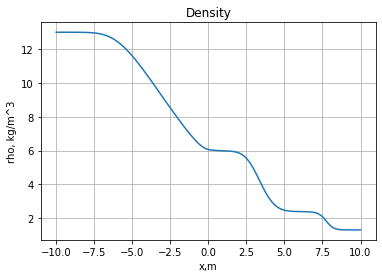

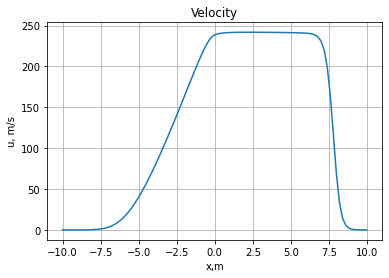

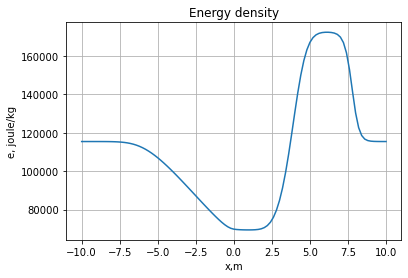

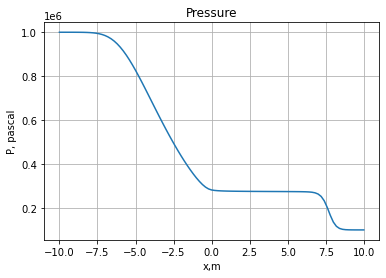

In [95]:
#plotting for t = 0.015 sec
index_to_show = 150
plt.plot(x, rho[index_to_show])
plt.title("Density")
plt.xlabel("x,m")
plt.ylabel("rho, kg/m^3")
plt.grid()
plt.show()

plt.plot(x, u[index_to_show])
plt.title("Velocity")
plt.xlabel("x,m")
plt.ylabel("u, m/s")
plt.grid()
plt.show()

plt.plot(x, e[index_to_show])
plt.title("Energy density")
plt.xlabel("x,m")
plt.ylabel("e, joule/kg")
plt.grid()
plt.show()

plt.plot(x, P[index_to_show])
plt.title("Pressure")
plt.xlabel("x,m")
plt.ylabel("P, pascal")
plt.grid()
plt.show()